In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [13]:
# Ładowanie danych
wine = load_wine()
x = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)  # typ wina (0,1,2)

x.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


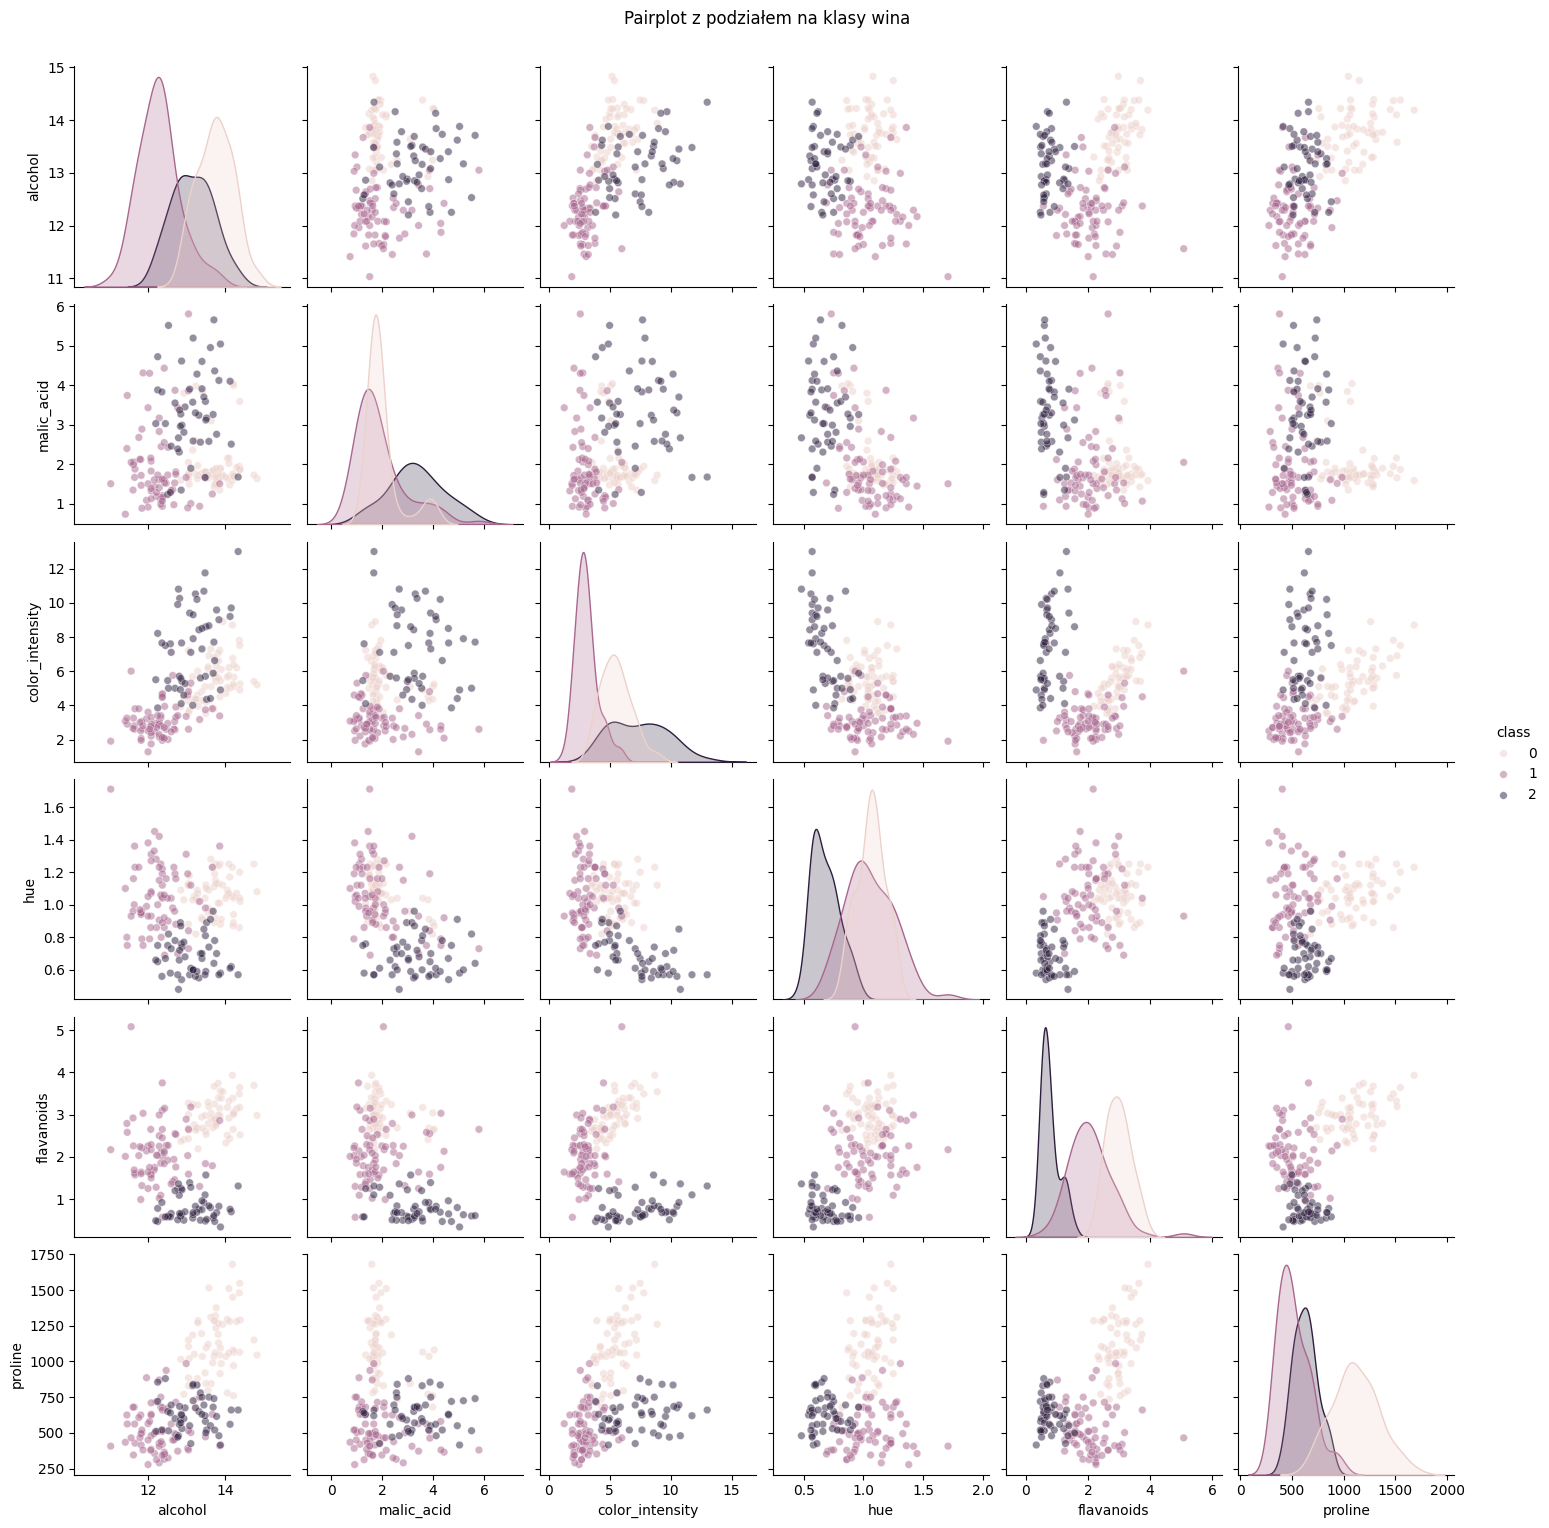

In [3]:
df = pd.DataFrame(x, columns=wine.feature_names)
df['class'] = y

# Wykres krzyżowy
sns.pairplot(df, hue='class', vars=['alcohol', 'malic_acid', 'color_intensity', 'hue', 'flavanoids', 'proline'], plot_kws={"alpha": 0.5, "s": 30})
plt.suptitle("Pairplot z podziałem na klasy wina", y=1.02)
plt.show()

In [4]:
# Podział danych do modelu
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [5]:
# Normalizacja
scaler = StandardScaler() # oblicza średnią i odchylenie
x_train_norm = scaler.fit_transform(x_train) # normalizacja treningu
x_test_norm = scaler.transform(x_test) # normalizacja testu

Normalizacja polega na przeskalowaniu danych tak, aby każda cecha miała średnią 0 i odchylenie standardowe 1. Robi się to po to, żeby w algorytmach cechy o większych liczbach nie zdominowały tych o mniejszych wartościach. Przykładowo, przed normalizacją wartości alkoholu to 13 i 14, a magnezu 100 i 300 — po normalizacji mogą mieć wartości np. 0 i 2 dla alkoholu oraz -1.5 i 2.15 dla magnezu. Dzięki temu wszystkie cechy mają równy wpływ na model, co poprawia jego skuteczność i dokładność. Normalizacja działa według wzoru: (wartość − średnia) / odchylenie. Jest szczególnie ważna w algorytmach opartych na odległościach, takich jak KNN, ponieważ bez niej cechy z dużymi liczbami mogłyby zdominować decyzje modelu. Wpływa na dalszy kod, poprawiając dokładność i stabilność wyników klasyfikacji. W praktyce, normalizacja przygotowuje dane do uczciwego i efektywnego uczenia się przez model.

In [6]:
# Trening modeli
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_norm, y_train)

rf = RandomForestClassifier(random_state=123)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

KNeighborsClassifier to algorytm, który przypisuje nowy punkt do takiej klasy, jaka dominuje wśród jego najbliższych sąsiadów. Liczy on odległości (np. euklidesowe) między nowymi danymi a tymi, które zna, i na tej podstawie dokonuje klasyfikacji. Kluczowy argument to n_neighbors, który mówi, ilu sąsiadów ma wziąć pod uwagę. Inne opcje to weights='uniform' (wszyscy sąsiedzi mają równą wagę) lub weights='distance' (bliżsi są ważniejsi), a także metric='minkowski', która definiuje sposób mierzenia odległości. Przykład: mamy dane o trzech winach, każde opisane poziomem alkoholu i kwasowości. Jeśli chcemy zaklasyfikować nowe wino o podobnych wartościach, algorytm sprawdza np. 5 najbliższych win i wybiera klasę, która występuje najczęściej. Im bliższy sąsiad, tym większy jego wpływ (jeśli użyjemy weights='distance'). Bez normalizacji może źle działać, bo cechy o większych liczbach zdominują wynik.

RandomForestClassifier to algorytm oparty na wielu drzewach decyzyjnych — każdy z nich głosuje, a wynik to większość głosów. Uczy się na losowych fragmentach danych i dzięki temu jest bardziej odporny na przeuczenie. Główne argumenty to n_estimators, czyli liczba drzew (np. 100), max_depth, czyli maksymalna głębokość każdego drzewa, random_state – dla powtarzalności wyników, oraz max_features, które ogranicza liczbę cech rozważanych przy każdym podziale. RandomForest dobrze działa nawet bez normalizacji i radzi sobie z danymi o różnej skali. Przykład: jedno drzewo może uczyć się na cechach alkohol i cukier, inne na magnez i barwa. Każde drzewo głosuje, do jakiej klasy należy nowe wino, a RandomForest wybiera klasę z największą liczbą głosów. Dzięki losowości i dużej liczbie drzew (n_estimators=100) model jest stabilny i rzadziej się przeucza. Działa dobrze nawet bez normalizacji, bo drzewa nie używają odległości.

In [7]:
# Predykcja
y_pred_knn = knn.predict(x_test_norm)
y_pred_rf = rf.predict(x_test)

In [8]:
# Ewaluacja-KNN
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.9629629629629629
Precision: 0.9583333333333334
Recall: 0.9629629629629629
F1 Score: 0.9581699346405229
Confusion matrix:
 [[14  0  0]
 [ 2 16  0]
 [ 0  0 22]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.89      0.94        18
           2       1.00      1.00      1.00        22

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



In [9]:
# Ewaluacja-Random Forest
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9814814814814815
Precision: 0.9824561403508771
Recall: 0.9848484848484849
F1 Score: 0.9832390530064948
Confusion matrix:
 [[14  0  0]
 [ 0 18  0]
 [ 0  1 21]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        22

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



- Accuracy – procent poprawnych przewidywań spośród wszystkich. Dobre przy zbalansowanych klasach.
- Precision – ile z przewidzianych przypadków danej klasy jest faktycznie poprawnych (mało fałszywych alarmów).
- Recall – ile rzeczywistej klasy model wykrył (czy model nie przeoczył przypadków danej klasy).
- F1 Score – średnia harmoniczna Precision i Recall; używana, gdy zależy nam na ich równowadze.
- Confusion Matrix – macierz pokazująca, ile razy model trafił lub pomylił każdą klasę. Daje obraz błędów.
- Classification Report – tabela podsumowująca precision, recall, F1-score i liczbę przypadków (support) dla każdej klasy.

Model Random Forest uzyskał lepsze wyniki niż KNN we wszystkich metrykach, co oznacza, że dokładniej przewiduje klasy wina. Jego accuracy, precision, recall i F1-score są nieco wyższe, co pokazuje, że rzadziej popełnia błędy i lepiej wykrywa wszystkie przypadki. Różnica może wynikać z tego, że Random Forest to złożony model oparty na wielu drzewach decyzyjnych, które uczą się różnych części danych i głosują, co zmniejsza ryzyko błędów. KNN z kolei działa na zasadzie podobieństwa do sąsiadów i może się mylić, jeśli dane są zagęszczone lub źle rozdzielone. Random Forest radzi sobie lepiej w bardziej złożonych przypadkach, bo analizuje więcej informacji naraz i potrafi wykrywać wzorce w danych, które KNN może przeoczyć.

Na wykresie widzimy zależności między wybranymi cechami chemicznymi win z podziałem na trzy klasy. Punkty reprezentują pojedyncze próbki win – ich kolor wskazuje przynależność do konkretnej klasy. Wykresy gęstości (krzywe na przekątnej) pokazują, jak rozkłada się dana cecha w obrębie każdej klasy – im wyższy „pagórek”, tym więcej win w danej klasie ma taką wartość cechy. Dzięki temu widzimy, które cechy najlepiej rozróżniają klasy (np. flavanoids, alcohol, proline), a które mają duże nakładanie (np. malic_acid, hue).
